# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [12]:
import pandas as pd
from sklearn.cluster import KMeans# .. your code here ..

import matplotlib.pyplot as plt
import matplotlib

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [13]:
df = pd.read_csv('Datasets/Crimes_-_2001_to_present.csv')# .. your code here ..
print(df)

             ID Case Number                    Date  \
0       4647776    HM172874  02/09/2006 10:29:07 PM   
1       4649196    HM157167  02/01/2006 12:30:27 PM   
2       4649661    HM159623  02/02/2006 07:02:12 PM   
3       4650448    HM158020  02/01/2006 08:13:00 PM   
4       4650940    HM156984  02/01/2006 10:10:00 AM   
5       4651151    HM161364  02/03/2006 04:40:00 PM   
6       4656683    HM161437  02/03/2006 04:30:00 PM   
7       4656759    HM161911  02/03/2006 08:00:00 PM   
8       4657274    HM159750  02/02/2006 07:30:00 PM   
9       4657315    HM159804  02/02/2006 06:50:00 PM   
10      4660220    HM259820  03/29/2006 03:35:00 PM   
11      4662776    HM168656  02/07/2006 05:20:00 PM   
12      4663539    HM166553  02/06/2006 03:18:40 PM   
13      4663794    HM263708  03/31/2006 01:00:00 PM   
14      4667660    HM172239  02/09/2006 03:45:24 PM   
15      4668207    HM146972  01/26/2006 10:05:00 PM   
16      4669202    HM168718  02/07/2006 05:50:00 PM   
17      46

Get rid of any _rows_ that have nans in them:

In [14]:
df = df.dropna(axis = 0, how='any')# .. your code here ..

Display the `dtypes` of your dset:

In [15]:
print(df.dtypes)# .. your code here ..

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object


Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [16]:
df.Date = pd.to_datetime(df.Date)# .. your code here ..
print(df.dtypes)

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


In [19]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    # .. your code here ..
    df = df[['Longitude', 'Latitude']]

    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    # .. your code here ..
    model = KMeans(n_clusters = 7)
    model.fit(df)
    
    labels = model.predict(df)
    

    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.7568882   41.89340748]
 [-87.66471728  41.77277855]
 [-87.63117574  41.6966916 ]
 [-87.58258032  41.75264147]
 [-87.68501799  41.98177431]
 [-87.61950323  41.80346734]
 [-87.70961882  41.87816009]]


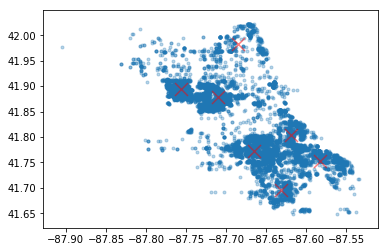

In [23]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [26]:
df = df.loc[df['Date'] > '2011-01-01']# .. your code here ..

[[-87.66557719  41.77580563]
 [-87.7547907   41.8898888 ]
 [-87.63468759  41.70570384]
 [-87.57978912  41.75092244]
 [-87.68692804  41.98387683]
 [-87.71062829  41.87542889]
 [-87.62001419  41.79060621]]


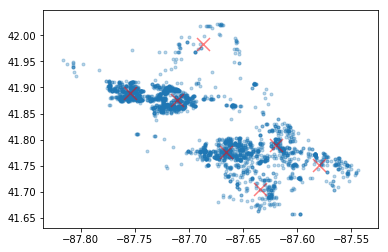

In [27]:
# Print & Plot your data
doKMeans(df)